In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Test 데이터셋에 대한 Epoch 별 결과
- PC에 csv 파일로 따로 저장해 별도의 이름 변경 작업 필요

In [3]:
test = pd.read_csv("monologg-sts-valid.csv")
test = test.drop(["Unnamed: 0"], axis = 1).rename(columns = {"val_loss" : "test_loss", "f1_score" : "test_f1_score", "pearsonr" : "test_pearsonr"})
test["name"] = test['name'].apply(lambda x : str(x).split("/")[2])
test['name'] = test['name'].apply(lambda x : "-".join(str(x).split("-")[:4]))

In [4]:
test

,name,test_loss,test_f1_score,test_pearsonr
0,sparkling-sweep-7-9,0.314946,85.654886,93.017024
1,fast-sweep-5-2,0.446036,84.765625,91.994137
2,sparkling-sweep-7-3,0.442770,85.487078,92.034039
3,twilight-sweep-10-5,0.348137,84.552846,92.695814
4,comic-sweep-9-6,0.338825,84.959350,92.841258
...,...,...,...,...
95,comic-sweep-9-0,0.477055,84.812623,90.847050
96,comic-sweep-9-1,0.638054,82.264151,90.179094
97,twilight-sweep-10-8,0.319049,85.132383,92.958405
98,astral-sweep-3-4,0.360022,85.943775,92.258432


- wandb에서 validation 데이터에 대해서 실행한 결과 다운로드 받아와서 확인
- min, max 열은 의미 없으므로 제거
- 각 행의 결과가 Epoch 별 결과


![image](https://user-images.githubusercontent.com/86637320/166138953-bd81cd59-2c45-4a6b-a274-531f3a976099.png)

[결과 확인](https://wandb.ai/woodywarhol99/monologg-sts-20000/reports/KLUE-STS--VmlldzoxOTI2NTYx?accessToken=t06zas1bur5nonwol5ql1r4hwv4f58jxm3l0zwi7y8hq5cg8earwkj5cxmo8sn6d)

In [5]:
val_loss = pd.read_csv("val_loss.csv")
val_pearsonr = pd.read_csv("pearsonr.csv")
val_f1 = pd.read_csv("f1_score.csv")
val_loss

,Step,twilight-sweep-10 - total_valid_loss,twilight-sweep-10 - total_valid_loss__MIN,twilight-sweep-10 - total_valid_loss__MAX,comic-sweep-9 - total_valid_loss,comic-sweep-9 - total_valid_loss__MIN,comic-sweep-9 - total_valid_loss__MAX,helpful-sweep-8 - total_valid_loss,helpful-sweep-8 - total_valid_loss__MIN,helpful-sweep-8 - total_valid_loss__MAX,...,copper-sweep-4 - total_valid_loss__MAX,astral-sweep-3 - total_valid_loss,astral-sweep-3 - total_valid_loss__MIN,astral-sweep-3 - total_valid_loss__MAX,fearless-sweep-2 - total_valid_loss,fearless-sweep-2 - total_valid_loss__MIN,fearless-sweep-2 - total_valid_loss__MAX,dazzling-sweep-1 - total_valid_loss,dazzling-sweep-1 - total_valid_loss__MIN,dazzling-sweep-1 - total_valid_loss__MAX
0,11,0.352640,0.352640,0.352640,0.191461,0.191461,0.191461,0.277197,0.277197,0.277197,...,0.207574,0.209491,0.209491,0.209491,0.151885,0.151885,0.151885,0.197982,0.197982,0.197982
1,23,0.140768,0.140768,0.140768,0.223999,0.223999,0.223999,0.132750,0.132750,0.132750,...,0.141717,0.157893,0.157893,0.157893,0.162219,0.162219,0.162219,0.199767,0.199767,0.199767
2,35,0.123681,0.123681,0.123681,0.131621,0.131621,0.131621,0.120084,0.120084,0.120084,...,0.141851,0.124738,0.124738,0.124738,0.185822,0.185822,0.185822,0.122156,0.122156,0.122156
3,47,0.131809,0.131809,0.131809,0.106820,0.106820,0.106820,0.104457,0.104457,0.104457,...,0.145309,0.107852,0.107852,0.107852,0.119553,0.119553,0.119553,0.116131,0.116131,0.116131
4,59,0.105063,0.105063,0.105063,0.099872,0.099872,0.099872,0.099499,0.099499,0.099499,...,0.121435,0.111105,0.111105,0.111105,0.115568,0.115568,0.115568,0.128595,0.128595,0.128595
5,71,0.095339,0.095339,0.095339,0.098275,0.098275,0.098275,0.099340,0.099340,0.099340,...,0.096718,0.089958,0.089958,0.089958,0.115012,0.115012,0.115012,0.108096,0.108096,0.108096
6,83,0.104939,0.104939,0.104939,0.090451,0.090451,0.090451,0.087082,0.087082,0.087082,...,0.091955,0.089651,0.089651,0.089651,0.102971,0.102971,0.102971,0.106923,0.106923,0.106923
7,95,0.095172,0.095172,0.095172,0.088218,0.088218,0.088218,0.096088,0.096088,0.096088,...,0.091918,0.094902,0.094902,0.094902,0.098701,0.098701,0.098701,0.119245,0.119245,0.119245
8,107,0.094891,0.094891,0.094891,0.086781,0.086781,0.086781,0.087998,0.087998,0.087998,...,0.086764,0.088506,0.088506,0.088506,0.094574,0.094574,0.094574,0.099611,0.099611,0.099611
9,119,0.096358,0.096358,0.096358,0.085740,0.085740,0.085740,0.087996,0.087996,0.087996,...,0.086523,0.088650,0.088650,0.088650,0.094852,0.094852,0.094852,0.101145,0.101145,0.101145


In [6]:
cols_loss = ["twilight-sweep-10 - total_valid_loss", "comic-sweep-9 - total_valid_loss", "helpful-sweep-8 - total_valid_loss", "sparkling-sweep-7 - total_valid_loss", \
                    "giddy-sweep-6 - total_valid_loss", "fast-sweep-5 - total_valid_loss", "copper-sweep-4 - total_valid_loss", "astral-sweep-3 - total_valid_loss",\
                    "fearless-sweep-2 - total_valid_loss", "dazzling-sweep-1 - total_valid_loss"]



In [7]:
cols_pearsonr = ["twilight-sweep-10 - total_pearsonr", "comic-sweep-9 - total_pearsonr", "helpful-sweep-8 - total_pearsonr", "sparkling-sweep-7 - total_pearsonr", \
                    "giddy-sweep-6 - total_pearsonr", "fast-sweep-5 - total_pearsonr", "copper-sweep-4 - total_pearsonr", "astral-sweep-3 - total_pearsonr",\
                    "fearless-sweep-2 - total_pearsonr", "dazzling-sweep-1 - total_pearsonr"]

In [8]:
cols_f1 = ["twilight-sweep-10 - total_f1_score", "comic-sweep-9 - total_f1_score", "helpful-sweep-8 - total_f1_score", "sparkling-sweep-7 - total_f1_score", \
                    "giddy-sweep-6 - total_f1_score", "fast-sweep-5 - total_f1_score", "copper-sweep-4 - total_f1_score", "astral-sweep-3 - total_f1_score",\
                    "fearless-sweep-2 - total_f1_score", "dazzling-sweep-1 - total_f1_score"]

- 사용할 열만 가져오기

In [9]:
val_loss = val_loss[cols_loss]
val_pearsonr = val_pearsonr[cols_pearsonr]
val_f1 = val_f1[cols_f1]

- dazzling-1
- fearless-2
- astral-3
- copper-4
- fast-5
- giddy-6
- sparkling-7
- helpful-8
- comic-9
- twilight-10

- Sweep 별로 분리해서 값 가져오기
- 가져온 다음에 concat

In [10]:
test_1 = test.loc[test.name.str.contains("dazzling")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_2 = test.loc[test.name.str.contains("fearless")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_3 = test.loc[test.name.str.contains("astral")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_4 = test.loc[test.name.str.contains("copper")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_5 = test.loc[test.name.str.contains("fast")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_6 = test.loc[test.name.str.contains("giddy")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_7 = test.loc[test.name.str.contains("sparkling")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_8 = test.loc[test.name.str.contains("helpful")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_9 = test.loc[test.name.str.contains("comic")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_10 = test.loc[test.name.str.contains("twilight")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)

In [11]:
test_1['val_loss'] = val_loss['dazzling-sweep-1 - total_valid_loss']
test_1['val_f1_score'] = val_f1['dazzling-sweep-1 - total_f1_score']
test_1['val_pearsonr'] = val_pearsonr["dazzling-sweep-1 - total_pearsonr"]
test_1['epoch'] = test_1.index + 1

test_2['val_loss'] = val_loss['fearless-sweep-2 - total_valid_loss']
test_2['val_f1_score'] = val_f1['fearless-sweep-2 - total_f1_score']
test_2['val_pearsonr'] = val_pearsonr["fearless-sweep-2 - total_pearsonr"]
test_2['epoch'] = test_2.index + 1

test_3['val_loss'] = val_loss['astral-sweep-3 - total_valid_loss']
test_3['val_f1_score'] = val_f1['astral-sweep-3 - total_f1_score']
test_3['val_pearsonr'] = val_pearsonr["astral-sweep-3 - total_pearsonr"]
test_3['epoch'] = test_3.index + 1

test_4['val_loss'] = val_loss['copper-sweep-4 - total_valid_loss']
test_4['val_f1_score'] = val_f1['copper-sweep-4 - total_f1_score']
test_4['val_pearsonr'] = val_pearsonr["copper-sweep-4 - total_pearsonr"]
test_4['epoch'] = test_4.index + 1

test_5['val_loss'] = val_loss['fast-sweep-5 - total_valid_loss']
test_5['val_f1_score'] = val_f1['fast-sweep-5 - total_f1_score']
test_5['val_pearsonr'] = val_pearsonr["fast-sweep-5 - total_pearsonr"]
test_5['epoch'] = test_5.index + 1

test_6['val_loss'] = val_loss['giddy-sweep-6 - total_valid_loss']
test_6['val_f1_score'] = val_f1['giddy-sweep-6 - total_f1_score']
test_6['val_pearsonr'] = val_pearsonr["giddy-sweep-6 - total_pearsonr"]
test_6['epoch'] = test_6.index + 1

test_7['val_loss'] = val_loss['sparkling-sweep-7 - total_valid_loss']
test_7['val_f1_score'] = val_f1['sparkling-sweep-7 - total_f1_score']
test_7['val_pearsonr'] = val_pearsonr["sparkling-sweep-7 - total_pearsonr"]
test_7['epoch'] = test_7.index + 1

test_8['val_loss'] = val_loss['helpful-sweep-8 - total_valid_loss']
test_8['val_f1_score'] = val_f1['helpful-sweep-8 - total_f1_score']
test_8['val_pearsonr'] = val_pearsonr["helpful-sweep-8 - total_pearsonr"]
test_8['epoch'] = test_8.index + 1

test_9['val_loss'] = val_loss['comic-sweep-9 - total_valid_loss']
test_9['val_f1_score'] = val_f1['comic-sweep-9 - total_f1_score']
test_9['val_pearsonr'] = val_pearsonr["comic-sweep-9 - total_pearsonr"]
test_9['epoch'] = test_9.index + 1

test_10['val_loss'] = val_loss['twilight-sweep-10 - total_valid_loss']
test_10['val_f1_score'] = val_f1['twilight-sweep-10 - total_f1_score']
test_10['val_pearsonr'] = val_pearsonr["twilight-sweep-10 - total_pearsonr"]
test_10['epoch'] = test_10.index + 1

- 최종 결과

In [12]:
test_final = pd.concat([test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8, test_9, test_10]).reset_index().drop(['index'], axis = 1)
test_final

,name,test_loss,test_f1_score,test_pearsonr,val_loss,val_f1_score,val_pearsonr,epoch
0,dazzling-sweep-1-0,0.613138,82.666667,89.462811,0.197982,88.833124,96.467023,1
1,dazzling-sweep-1-1,0.605983,81.647940,89.904005,0.199767,87.431694,96.726227,2
2,dazzling-sweep-1-2,0.359388,84.848485,91.879176,0.122156,92.938803,97.367814,3
3,dazzling-sweep-1-3,0.392920,85.657371,92.395255,0.116131,92.277487,97.680770,4
4,dazzling-sweep-1-4,0.403971,84.980237,92.537654,0.128595,91.856678,97.597465,5
...,...,...,...,...,...,...,...,...
95,twilight-sweep-10-5,0.348137,84.552846,92.695814,0.095339,93.758480,97.928750,6
96,twilight-sweep-10-6,0.357702,84.444444,92.609267,0.104939,93.640054,97.832545,7
97,twilight-sweep-10-7,0.322710,84.848485,92.985890,0.095172,94.053315,97.895722,8
98,twilight-sweep-10-8,0.319049,85.132383,92.958405,0.094891,94.004135,97.932744,9


- Validation 값과 Test 값 사이 상관 관계 확인

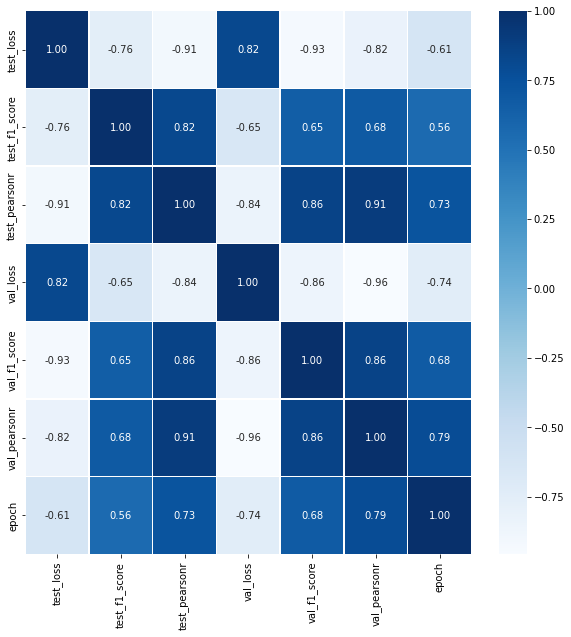

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data = test_final.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [14]:
test_final.corr()

,test_loss,test_f1_score,test_pearsonr,val_loss,val_f1_score,val_pearsonr,epoch
test_loss,1.000000,-0.757223,-0.910629,0.820733,-0.925342,-0.819900,-0.613596
test_f1_score,-0.757223,1.000000,0.822182,-0.647489,0.653778,0.681950,0.563475
test_pearsonr,-0.910629,0.822182,1.000000,-0.839504,0.857324,0.907189,0.726146
val_loss,0.820733,-0.647489,-0.839504,1.000000,-0.857239,-0.957372,-0.743090
val_f1_score,-0.925342,0.653778,0.857324,-0.857239,1.000000,0.861173,0.675598
val_pearsonr,-0.819900,0.681950,0.907189,-0.957372,0.861173,1.000000,0.786127
epoch,-0.613596,0.563475,0.726146,-0.743090,0.675598,0.786127,1.000000
